<a href="https://colab.research.google.com/github/rafatb/Berlin_Airbnb_Price_Prediction/blob/main/5_Airbnb_Berlin_Model_and_Hyperparameter_Finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressor Models and Hyperparameter Finetuning**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
#%matplotlib ipympl
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.datasets import make_classification
#from xgboost import XGBClassifier
#!pip install xgboost scikit-learn pandas numpy
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

#Get the data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/berline/after_feature_selection.csv')

In [5]:
df.head(5)

,Unnamed: 0,Accuracy Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Reviews,Bedrooms,Beds,Guests Included,Instant Bookable,Is Exact Location,Postal Code,Property Type,Neighborhood Group,Room Type,Distance From Center,Price
0,0,10.0,10.0,10.0,9.0,10.0,7.0,1.0,1.0,1.0,False,True,24,1,6,1,5.1,17.0
1,1,9.0,9.0,9.0,10.0,9.0,144.0,1.0,2.0,2.0,False,True,18,1,6,0,3.7,90.0
2,2,10.0,10.0,10.0,10.0,10.0,229.0,1.0,2.0,1.0,False,True,24,1,6,1,4.6,33.0
3,3,10.0,10.0,10.0,10.0,10.0,6.0,4.0,7.0,5.0,False,False,18,1,6,0,3.5,180.0
4,4,10.0,9.0,10.0,9.0,9.0,23.0,0.0,1.0,1.0,False,True,24,1,6,0,5.0,70.0


In [6]:
#stubborn upload bug is here to stay
del df['Unnamed: 0']
#del df_ros['split']

In [7]:
df.shape

(23536, 17)

#Metrics init

In [ ]:
models_list = pd.DataFrame()

In [ ]:
def regressionMetrics(y, yhat):
    res = {'MSE': metrics.mean_squared_error(y,yhat),
           'RMSE': np.sqrt(metrics.mean_squared_error(y,yhat)),
           'MAE': metrics.mean_absolute_error(y,yhat),

          }
    # Calculate RMSLE using absolute values to avoid negative issues
    res['RMSLE'] = np.sqrt(metrics.mean_squared_log_error(np.abs(y), np.abs(yhat)))

    return res

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Accuracy Rating,23536.0,9.652787,0.777979,2.0,10.0,10.0,10.0,10.0
Checkin Rating,23536.0,9.717135,0.707289,2.0,10.0,10.0,10.0,10.0
Communication Rating,23536.0,9.735448,0.695917,2.0,10.0,10.0,10.0,10.0
Location Rating,23536.0,9.532843,0.763634,2.0,9.0,10.0,10.0,10.0
Value Rating,23536.0,9.391188,0.878062,2.0,9.0,10.0,10.0,10.0
Reviews,23536.0,19.238826,40.360483,0.0,1.0,5.0,17.0,545.0
Bedrooms,23536.0,1.161667,0.660499,0.0,1.0,1.0,1.0,10.0
Beds,23536.0,1.641762,1.228880,0.0,1.0,1.0,2.0,22.0
Guests Included,23536.0,1.346151,0.856297,1.0,1.0,1.0,1.0,16.0
Postal Code,23536.0,60.090755,53.656203,0.0,18.0,56.0,73.0,206.0


Display correlation and heat map

<Axes: >

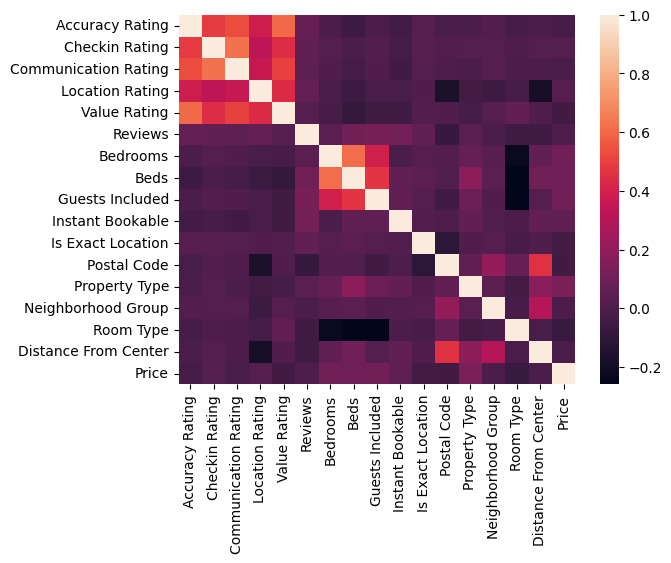

In [9]:
sns.heatmap(df.corr())

Display the correlation

In [12]:
df.corr()

,Accuracy Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Reviews,Bedrooms,Beds,Guests Included,Instant Bookable,Is Exact Location,Postal Code,Property Type,Neighborhood Group,Room Type,Distance From Center,Price
Accuracy Rating,1.000000,0.487069,0.528905,0.380037,0.605289,0.070995,-0.006562,-0.053644,-0.003971,-0.037632,0.025279,-0.016297,-0.010501,0.015007,-0.025842,-0.013021,-0.029902
Checkin Rating,0.487069,1.000000,0.621532,0.322948,0.440097,0.059460,0.018309,-0.009922,0.015574,-0.023945,0.031248,0.006769,0.020313,0.020047,-0.002463,0.016425,0.019832
Communication Rating,0.528905,0.621532,1.000000,0.359016,0.500024,0.048549,0.003940,-0.032547,0.001305,-0.040672,0.016435,-0.003137,-0.008806,0.020207,-0.007167,-0.003913,-0.017054
Location Rating,0.380037,0.322948,0.359016,1.000000,0.430012,0.066081,-0.014613,-0.056217,-0.013748,-0.013706,0.004991,-0.166678,-0.037027,-0.061056,-0.024639,-0.182816,0.024410
Value Rating,0.605289,0.440097,0.500024,0.430012,1.000000,0.019200,-0.023149,-0.083892,-0.044786,-0.045712,0.006751,0.002756,-0.027432,0.025000,0.063520,0.001871,-0.041020
Reviews,0.070995,0.059460,0.048549,0.066081,0.019200,1.000000,0.039710,0.106012,0.127168,0.113040,0.058045,-0.077138,0.039797,-0.008697,-0.044036,-0.046744,-0.001546
Bedrooms,-0.006562,0.018309,0.003940,-0.014613,-0.023149,0.039710,1.000000,0.616095,0.390459,-0.012421,0.025732,0.012257,0.070697,0.035570,-0.225871,0.058883,0.107012
Beds,-0.053644,-0.009922,-0.032547,-0.056217,-0.083892,0.106012,0.616095,1.000000,0.465730,0.060169,0.043554,0.010940,0.180002,0.036998,-0.259591,0.104756,0.098237
Guests Included,-0.003971,0.015574,0.001305,-0.013748,-0.044786,0.127168,0.390459,0.465730,1.000000,0.060148,0.019453,-0.042822,0.089397,0.003460,-0.258283,0.018690,0.109113
Instant Bookable,-0.037632,-0.023945,-0.040672,-0.013706,-0.045712,0.113040,-0.012421,0.060169,0.060148,1.000000,0.006965,0.000905,0.064506,0.009563,-0.003844,0.059343,0.052882


#price destripution

<Axes: xlabel='Price', ylabel='Density'>

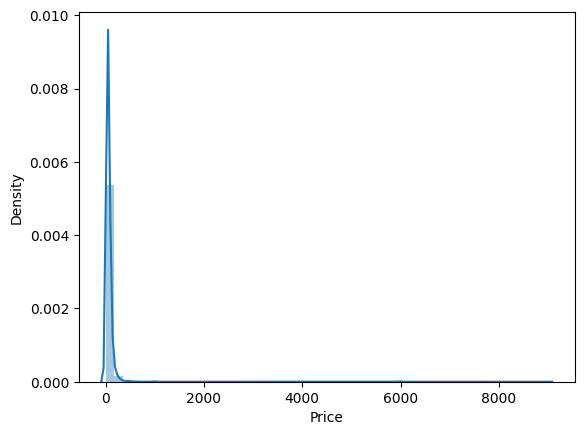

In [11]:
sns.distplot(df.Price)